In [1]:
import torch
import torchvision
from alae import ALAE
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:0")

In [2]:
mnist_train = torchvision.datasets.MNIST(
    '/files/',
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
)

mnist_test = torchvision.datasets.MNIST(
    '/files/',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

In [3]:
alae = ALAE().to(device)

In [24]:
alae.train()
train_hist, test_hist = alae.fit(train_loader, test_loader, epochs = 1)
alae.eval()
print('done')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:34<00:00, 34.94s/it]

done


In [25]:
idx = 1
_, (img_tensors, target) = next(enumerate(test_loader))
flat_img = torch.reshape(img_tensors, (-1, 784))
eye = torch.tensor(np.eye(10)[target], dtype=torch.float)
nn_input = torch.cat([flat_img, eye], dim=-1).to(device)
latent = alae.e(nn_input[idx: idx + 1])
gen_img = alae.g(latent).detach().cpu().numpy()[0, :784].reshape(28, 28)

In [26]:
latent.shape

torch.Size([1, 50])

In [27]:
gen_img.shape

(28, 28)

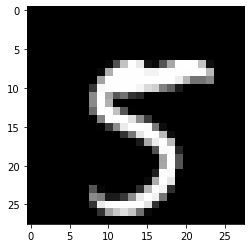

In [28]:
plt.imshow(np.clip(img_tensors[idx: idx + 1], 0, 1)[0][0], cmap='gray')

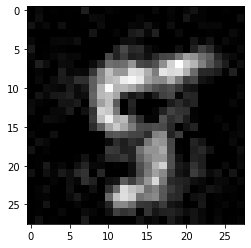

In [29]:
plt.imshow(np.clip(gen_img, 0, 1), cmap='gray')

In [30]:
torch.save(alae.state_dict(), './test.pt')

In [31]:
idxA, idxB = 2, 5
latentA = alae.e(nn_input[idxA:idxA + 1].reshape(1, 784 + 10))
latentB = alae.e(nn_input[idxB:idxB + 1].reshape(1, 784 + 10))

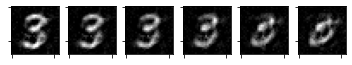

In [32]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA.clone()
for i in range(num + 1):
    image = alae.g(latent).detach().cpu().numpy()[0, :784].reshape(28, 28)
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(image, 0, 1), cmap='gray')
    latent += delta

plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

In [33]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


def update(factor):
    latent = latentA.clone()
    image = alae.g(latent + delta * factor).detach().cpu().numpy()[0, :784].reshape(28, 28)
    plt.imshow(np.clip(image, 0, 1), cmap='gray')

interact(update, factor = widgets.FloatSlider(value=0, min=0, max=num + 1, step=1))

interactive(children=(FloatSlider(value=0.0, description='factor', max=6.0, step=1.0), Output()), _dom_classes…

<function __main__.update(factor)>